# **Homework 2, Saif Khawaja 87474921**

# Collaborated with Raveen K

## **Section 1**

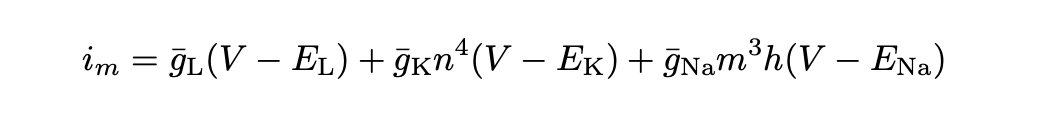

1. In this equation, i is the specific membrane current. H&H used this to model the current of ions tranvelling across a neural membrane driven by electrochemical gradients. Each separate contributor is a current that arises because of a different ion channel or leakage.

g_bar is the signifier for maximum membrane permeabiliy (channel density x single channel conductivity) for each contributor, which controls the conductivity of the individual voltage gated ion channels.

E is the reverse equilibrium potential of each ion, while V is the potential difference across the psynapse at the given state.

Each subscript refers to separate states. L subscript refers to the potentials that contribute to the leakage current, and Na and K refer to sodium and potassium ion channel potentials. 

n and m refer to the activation probabilities of potassium and sodium channels respectively (Pi = n^k). We take it to the power of 4 and 3 because it fit the large amount of data collected by H&H for both potassium and sodium as they relate to the number of gates in both ion channel types. h is the probability of the gate closing. 

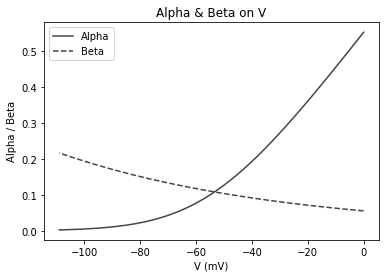

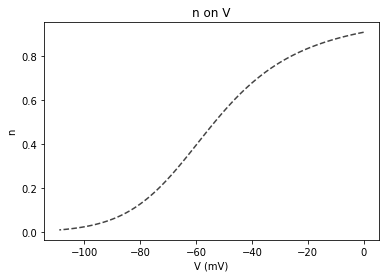

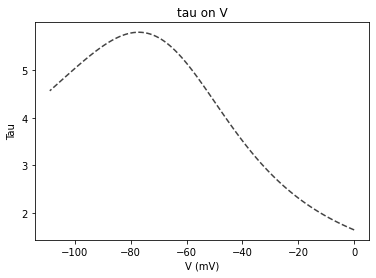

In [ ]:
import matplotlib.pyplot as plt
import math

alphaN = {}
betaN = {}

n_v = {}

tau_v = {}

V = 0
Vf = - 110
dV = - 1

# N 

while V > Vf:
  
  if V == -55:
    V = V + dV
  else:  
    a = (0.01 * (V + 55)) / (1 - math.exp(-0.1 * (V+55)))
    alphaN[V] = a

    b = 0.125 * math.exp(-0.0125 * (V + 65))
    betaN[V] = b

    n_v[V] = a / (a + b)

    tau_v[V] = 1 / (a + b)

    V = V + dV


plt.plot(list(alphaN.keys()), list(alphaN.values()), color='#444444', linestyle='-', label='Alpha')
plt.plot(list(betaN.keys()), list(betaN.values()), color='#444444', linestyle='--', label='Beta')
plt.xlabel('V (mV)')
plt.ylabel('Alpha / Beta')
plt.title('Alpha & Beta on V')
plt.legend()
plt.show()

plt.plot(list(n_v.keys()), list(n_v.values()), color='#444444', linestyle='--', label='')
plt.xlabel('V (mV)')
plt.ylabel('n')
plt.title('n on V')
plt.show()

plt.plot(list(tau_v.keys()), list(tau_v.values()), color='#444444', linestyle='--', label='')
plt.xlabel('V (mV)')
plt.ylabel('Tau')
plt.title('tau on V')
plt.show()

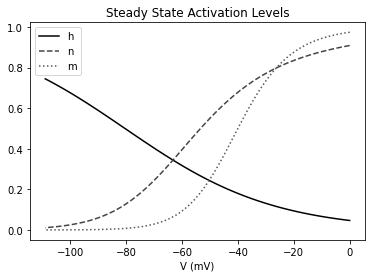

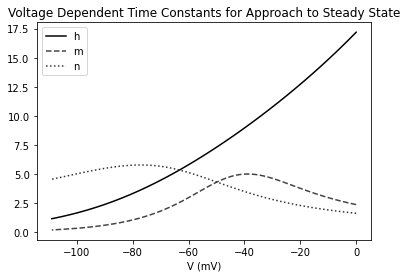

In [ ]:
# M

V = 0
Vf = - 110
dV = - 1

alphaM = {}
betaM = {}

m_v = {}
tau_m = {}

while V > Vf:
  
  if V == -40:
    V = V + dV
  else: 
    a2 = (0.01 * (V + 40)) / (1 - math.exp(-0.1 * (V+40)))
    alphaM[V] = a2

    b2 = 0.4 * math.exp(-0.0556 * (V + 65))
    betaM[V] = b2

    m_v[V] = a2 / (a2 + b2)
    tau_m[V] = 1 / (a2 + b2)
    
    V = V + dV

# H 

V = 0
Vf = - 110
dV = - 1

alphaH = {}
betaH = {}

h_v = {}
tau_h = {}

while V > Vf:
  
  if V == -65:
    V = V + dV
  else: 
    a3 = (0.07 * math.exp(-0.05 * (V + 65)))
    alphaH[V] = a3

    b3 = 0.125 * math.exp(-0.0125 * (V + 65))
    betaH[V] = b3

    h_v[V] = a3 / (a3 + b3)
    tau_h[V] = 1 / (a3 + b3)

    V = V + dV

plt.plot(list(h_v.keys()), list(h_v.values()), color='#000000', linestyle='-', label='h')
plt.plot(list(n_v.keys()), list(n_v.values()), color='#444444', linestyle='--', label='n')
plt.plot(list(m_v.keys()), list(m_v.values()), color='#565656', linestyle=':', label='m')
plt.xlabel('V (mV)')
plt.title('Steady State Activation Levels')
plt.legend()
plt.show()

plt.plot(list(tau_h.keys()), list(tau_h.values()), color='#000000', linestyle='-', label='h')
plt.plot(list(tau_m.keys()), list(tau_m.values()), color='#444444', linestyle='--', label='m')
plt.plot(list(tau_v.keys()), list(tau_v.values()), color='#333333', linestyle=':', label='n')
plt.legend()
plt.xlabel('V (mV)')
plt.title('Voltage Dependent Time Constants for Approach to Steady State')
plt.show()

In [ ]:
# Now simulate the Hodgkin-Huxley model numerically. 
# Use the parameters given on page 173 (also set: cm = 10nF/mm2, A = 0.1mm2).
# Set the initial voltage V (t = 0) to the resting potential V (t = 0) = −65mV . 
# Initialize n(t), m(t) and h(t) to their equilibrium values n∞(V (t = 0)), m∞(V (t = 0)) and h∞(V (t = 0)) 
# Reproduce the graphs in figure 5.11 qualitatively by simulating the injection of a suitable short 
# (try some values!) external current Ie(t) starting at t = 5ms.

# Hint: Some parameters may need to have their units adjusted so that Eqs. 5.6 and 
# 5.25 have compatible units (i.e. mV instead of V).

cm = 0.01
A = 0.1
Ie = 0.01 * 10 ** -9

Vo = -65
Vf = - 110
dV = - 1
io = 0

n = alphaN[-65] / (alphaN[-65] + betaN[-65])
m = alphaM[-65] / (alphaM[-65] + betaM[-65])
h = (alphaH[-64] / (alphaH[-64] + betaH[-64]) + alphaH[-66] / (alphaH[-66] + betaH[-66])) / 2

NN = {}
MM = {}
HH = {}

g_l = 0.003
g_k = 0.36
g_na = 1.2

E_k = -77
E_na = 50
E_l = -54.387

dt = 0.001
t = 0.005
tf = 0.1

while t < tf:
  dm = alphaM[V] * (1 − m) − (betaM[V] * m) * dt)
  dn = alphaN[V] * (1 − n) − (betaN[V] * n) * dt)
  dh = alphaH[V] * (1 − h) − (betaH[V] * h) * dt)

  a = (0.01 * (V + 55)) / (1 - math.exp(-0.1 * (V+55)))
  b = 0.125 * math.exp(-0.0125 * (V + 65))

  a2 = (0.01 * (V + 40)) / (1 - math.exp(-0.1 * (V+40)))
  b2 = 0.4 * math.exp(-0.0556 * (V + 65))

  a3 = (0.07 * math.exp(-0.05 * (V + 65)))
  b3 = 0.125 * math.exp(-0.0125 * (V + 65))

  im = (g_l * (V − E_l)) + g_k * (n**4)*(V − E_k) + g_na * (m**3) * h(i−1) * (V − E_na)
  dV = (−im + (I_e/A)) * (dt/cm)

  MM[t] = m
  NN[t] = n
  HH[t] = h

  m = m + dm
  n = n + dn
  h = h + dh
  
  t = t + dt

  if V > -110:
    V = V + dV
  else:
    V = V + 0

plt.plot(list(MM.keys()), list(MM.values()), color='#000000', linestyle='-', label='h')
plt.plot(list(NN.keys()), list(NN.values()), color='#444444', linestyle='--', label='m')
plt.plot(list(HH.keys()), list(HH.values()), color='#333333', linestyle=':', label='n')
plt.legend()
plt.xlabel('V (mV)')
plt.title('m,n,h on t')
plt.show()

plt.plot(list(ii.keys()), list(ii.values()), color='#000000', linestyle='-', label='h')
plt.legend()
plt.xlabel('V (mV)')
plt.title('i on t')
plt.show()

plt.plot(list(V.keys()), list(V.values()), color='#000000', linestyle='-', label='h')
plt.legend()
plt.xlabel('V (mV)')
plt.title('V on t')
plt.show()

SyntaxError: ignored

In [ ]:
# Simulate the blocking of the sodium channels by a toxin. To do this, set g_na:= 1/10 g_na. Plot
# the time courses as shown in figure 5.11. Now block (only) the potassium channels in the same way:
# set g_k= 1/10 g_k. Now see what would happen if the sodium channels were persistent. 
# To do this substitute m^3 → m^4. Do not change g_na or g_k this time.

cm = 0.01
A = 0.1
Ie = 0.01 * 10 ** -9

Vo = -65
Vf = - 110
dV = - 1
io = 0

n = alphaN[-65] / (alphaN[-65] + betaN[-65])
m = alphaM[-65] / (alphaM[-65] + betaM[-65])
h = (alphaH[-64] / (alphaH[-64] + betaH[-64]) + alphaH[-66] / (alphaH[-66] + betaH[-66])) / 2

NN = {}
MM = {}
HH = {}

g_l = 0.003
g_k = 0.036
g_na = 0.12

E_k = -77
E_na = 50
E_l = -54.387

dt = 0.001
t = 0.005
tf = 0.1

while t < tf:
  dm = alphaM[V] * (1 − m) − (betaM[V] * m) * dt)
  dn = alphaN[V] * (1 − n) − (betaN[V] * n) * dt)
  dh = alphaH[V] * (1 − h) − (betaH[V] * h) * dt)

  a = (0.01 * (V + 55)) / (1 - math.exp(-0.1 * (V+55)))
  b = 0.125 * math.exp(-0.0125 * (V + 65))

  a2 = (0.01 * (V + 40)) / (1 - math.exp(-0.1 * (V+40)))
  b2 = 0.4 * math.exp(-0.0556 * (V + 65))

  a3 = (0.07 * math.exp(-0.05 * (V + 65)))
  b3 = 0.125 * math.exp(-0.0125 * (V + 65))

  im = (g_l * (V − E_l)) + g_k * (n**4)*(V − E_k) + g_na * (m**4) * h(i−1) * (V − E_na)
  dV = (−im + (I_e/A)) * (dt/cm)

  MM[t] = m
  NN[t] = n
  HH[t] = h

  m = m + dm
  n = n + dn
  h = h + dh
  
  t = t + dt

  if V > -110:
    V = V + dV
  else:
    V = V + 0

plt.plot(list(MM.keys()), list(MM.values()), color='#000000', linestyle='-', label='h')
plt.plot(list(NN.keys()), list(NN.values()), color='#444444', linestyle='--', label='m')
plt.plot(list(HH.keys()), list(HH.values()), color='#333333', linestyle=':', label='n')
plt.legend()
plt.xlabel('V (mV)')
plt.title('m,n,h on t')
plt.show()

plt.plot(list(ii.keys()), list(ii.values()), color='#000000', linestyle='-', label='h')
plt.legend()
plt.xlabel('V (mV)')
plt.title('i on t')
plt.show()

plt.plot(list(V.keys()), list(V.values()), color='#000000', linestyle='-', label='h')
plt.legend()
plt.xlabel('V (mV)')
plt.title('V on t')
plt.show()

SyntaxError: ignored